<a href="https://colab.research.google.com/github/schardon/oda-demo-main/blob/main/Cybersecurity_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Times Period



In [1]:
from random import random

In [6]:
time_series = [2 * x + random() for x in range(1, 100)]



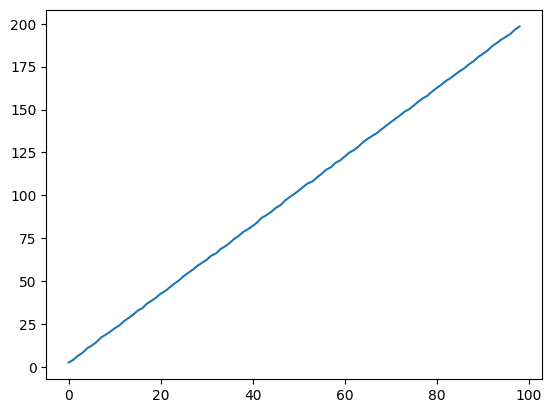

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(time_series)
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(time_series, order=(0, 1, 2))
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[199.76282762]


In [9]:
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(time_series, lags=2)
model_fit = model.fit()

y = model_fit.predict(len(time_series), len(time_series))
print(y)

[200.48941948]


In [10]:
model_fit.summary

<bound method AutoRegResults.summary of <statsmodels.tsa.ar_model.AutoRegResults object at 0x7f1882dbb820>>

In [11]:
model_fit.params


array([3.06681524, 0.47733061, 0.52249572])

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                     AutoReg(2)   Log Likelihood                 -25.433
Method:               Conditional MLE   S.D. of innovations              0.315
Date:                Mon, 17 Jun 2024   AIC                             58.867
Time:                        12:22:29   BIC                             69.166
Sample:                             2   HQIC                            63.031
                                   99                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0668      0.183     16.760      0.000       2.708       3.425
y.L1           0.4773      0.086      5.576      0.000       0.310       0.645
y.L2           0.5225      0.086      6.104      0.000       0.355       0.690
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
AR.2           -1.9137           +0.0000j            1.9137            0.5000
-----------------------------------------------------------------------------
"""

Anomally Detection using Isolation Forest


In [13]:
import numpy as np
import pandas as pd
random_seed = np.random.RandomState(12)

In [20]:
X_train = 0.5 * random_seed.randn(500, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame (X_train, columns=['x','y'])
X_train.head()

,x,y
0,2.386548,3.422143
1,2.015196,2.982321
2,2.857369,2.069379
3,3.207819,1.938520
4,2.585181,2.500689


In [21]:
X_test = 0.5 * random_seed.randn(100, 2)
X_test = np.r_[X_test +  3, X_test]

X_test = pd.DataFrame(X_test, columns=['x', 'y'])

X_test.head()

,x,y
0,2.882736,2.634214
1,3.098787,3.843054
2,3.371110,3.751492
3,2.114382,2.632556
4,2.509074,2.980954


In [18]:
X_outliers = random_seed.uniform(low=5, high=5, size=(50,2 ))
X_outliers = pd.DataFrame (X_outliers, columns=['x','y'])
X_outliers.head()

,x,y
0,5.0,5.0
1,5.0,5.0
2,5.0,5.0
3,5.0,5.0
4,5.0,5.0


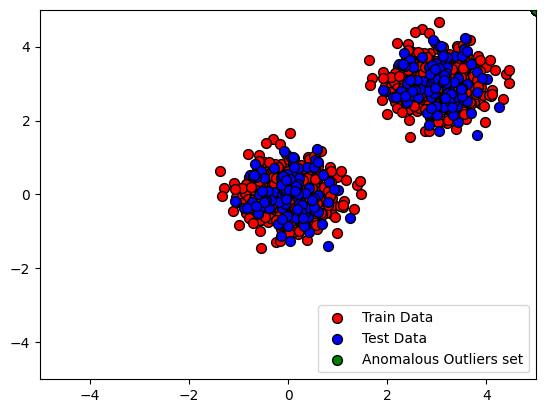

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

p1 = plt.scatter(X_train['x'], X_train['y'], c='red', s =50, edgecolors='k')
p2 = plt.scatter(X_test['x'], X_test['y'], c='blue', s =50, edgecolors='k')
p3 = plt.scatter(X_outliers['x'], X_outliers['y'], c='green', s =50, edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend([p1, p2, p3], ['Train Data', 'Test Data ', 'Anomalous Outliers set'], loc = "lower right")

plt.show()

In [23]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest()

clf.fit(X_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_outliers_pred = clf.predict(X_outliers)

In [24]:
X_outliers = X_outliers.assign(pred = y_outliers_pred)

X_outliers.head()

,x,y,pred
0,5.0,5.0,-1
1,5.0,5.0,-1
2,5.0,5.0,-1
3,5.0,5.0,-1
4,5.0,5.0,-1


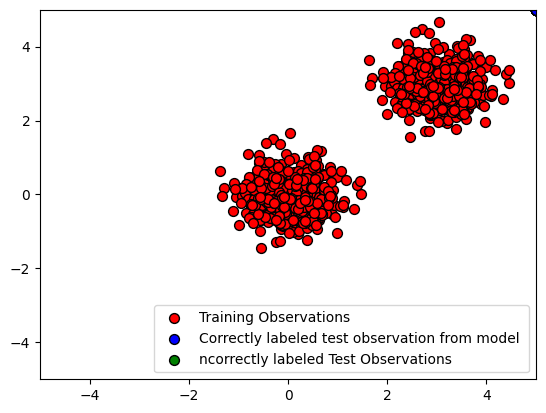

In [25]:
p1 = plt.scatter(X_train['x'], X_train['y'], c='red', s =50, edgecolors='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.pred == -1, ['x']], X_outliers.loc[X_outliers.pred == -1, ['y']], c='blue', s =50, edgecolors='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.pred == 1, ['x']], X_outliers.loc[X_outliers.pred == 1, ['y']], c='green', s =50, edgecolors='k')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend([p1, p2, p3], ['Training Observations', 'Correctly labeled test observation from model ', 'ncorrectly labeled Test Observations'], loc = "lower right")

plt.show()